**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

**Loading dataset**

In [2]:
college = pd.read_csv("../input/forbes-americas-top-colleges-2019/ForbesAmericasTopColleges2019.csv")

**1. Understanding the data**

In [3]:
college.shape

(650, 17)

There are 650 colleges with 17 different attributes (before cleaning).

In [4]:
college.head()

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu


In [5]:
college.tail()

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
645,646.0,New Mexico State University,Las Cruces,NM,Public,13379.0,14432.0,8625.0,9582.0,34720.0,96700.0,64.0,910.0,1160.0,18.0,23.0,www.nmsu.edu
646,647.0,Indiana State University,Terre Haute,IN,Public,13626.0,13763.0,13012.0,9297.0,32938.0,85600.0,85.0,900.0,1110.0,17.0,23.0,www.indstate.edu
647,648.0,Emory &amp; Henry College,Emory,VA,Private,1094.0,1226.0,19340.0,27155.0,48100.0,70700.0,72.0,988.0,1170.0,19.0,25.0,www.ehc.edu
648,649.0,Wells College,Aurora,NY,Private,488.0,516.0,22828.0,30207.0,55180.0,NaN,80.0,NaN,NaN,NaN,NaN,www.wells.edu
649,650.0,Catawba College,Salisbury,NC,Private,1336.0,1463.0,19807.0,23662.0,44921.0,78100.0,42.0,930.0,1100.0,18.0,23.0,www.catawba.edu


In [6]:
college.nunique()

Rank                        650
Name                        650
City                        469
State                        51
Public/Private                2
Undergraduate Population    623
Student Population          639
Net Price                   638
Average Grant Aid           639
Total Annual Cost           644
Alumni Salary               354
Acceptance Rate              93
SAT Lower                    97
SAT Upper                    90
ACT Lower                    20
ACT Upper                    16
Website                     645
dtype: int64

**2. Cleaning the data**

Removing columns we will not focus on and finding null values

In [7]:
college.isnull().sum()

Rank                         0
Name                         0
City                         3
State                        0
Public/Private               0
Undergraduate Population     0
Student Population           0
Net Price                    2
Average Grant Aid            4
Total Annual Cost            0
Alumni Salary               15
Acceptance Rate              2
SAT Lower                   99
SAT Upper                   99
ACT Lower                   97
ACT Upper                   97
Website                      5
dtype: int64

Columns that are not relevant to this analysis: City, State, Alumni Salary, SAT & ACT scores. 

In [8]:
college = college.drop(['City', 'State', 'Alumni Salary', 'SAT Lower', 'SAT Upper', 'ACT Lower', 'ACT Upper', 'Website'], axis = 1)

In [9]:
college.head()

,Rank,Name,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Acceptance Rate
0,1.0,Harvard University,Private,13844.0,31120.0,14327.0,49870.0,69600.0,5.0
1,2.0,Stanford University,Private,8402.0,17534.0,13261.0,50134.0,69109.0,5.0
2,3.0,Yale University,Private,6483.0,12974.0,18627.0,50897.0,71290.0,7.0
3,4.0,Massachusetts Institute of Technology,Private,4680.0,11466.0,20771.0,43248.0,67430.0,7.0
4,5.0,Princeton University,Private,5659.0,8273.0,9327.0,48088.0,66150.0,6.0


In [10]:
college.isnull().sum()

Rank                        0
Name                        0
Public/Private              0
Undergraduate Population    0
Student Population          0
Net Price                   2
Average Grant Aid           4
Total Annual Cost           0
Acceptance Rate             2
dtype: int64

Now we are left with the columns we will analyze

**3. Analysis**

**3.1** What can we find between the relationship of the Rank and Student Population within these colleges

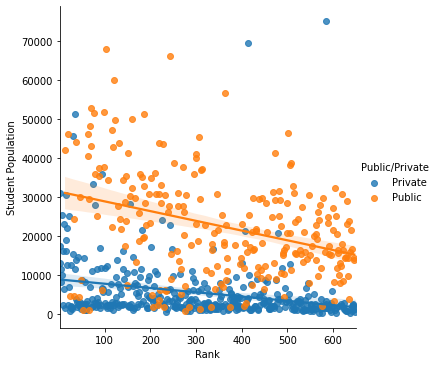

In [11]:
sns.lmplot(x="Rank", y="Student Population", hue="Public/Private",
             data=college)

Some information we can gather from this graph:
* The lower the ranking, the lower the Student Population
* Higher ranked colleges have higher Student Populations
* Overall, Public colleges have higher Student Populations

**3.2** How does a college's Rank and Acceptance Rate relate?

<AxesSubplot:xlabel='Rank', ylabel='Acceptance Rate'>

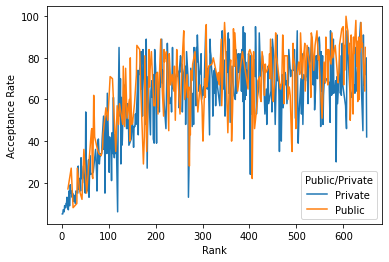

In [12]:
sns.lineplot(x="Rank", y="Acceptance Rate",
             hue="Public/Private", 
             data=college)

This shows that colleges that are ranked lower have higher acceptance rates & we can see how that differs between Private vs. Public colleges. 

**3.3** What relationship can we find between Rank and Cost?

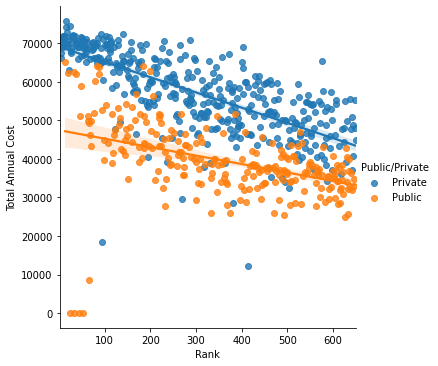

In [13]:
sns.lmplot(y='Total Annual Cost', x='Rank', hue="Public/Private", data=college)

Overall, we notice that higher ranked colleges have higher Total Annual Cost, and there is a decrease in cost as our x-value goes further to the right (as the college's rank becomes lower).

**3.4** How do Total Annual Cost and Average Grant Aid relate?

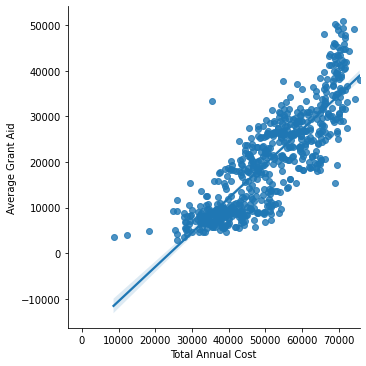

In [14]:
sns.lmplot(x='Total Annual Cost', y='Average Grant Aid', data=college)

From the scatterplot, we can conclude that colleges with a higher Total Annual Cost have more Average Grant Aid.

**4. Conclusion**

We've analyzed the relationship between different attributes in this dataset. 
We can come to a conclusion on how the rank of a college affects its student population, acceptance rate, cost and student aid. 